In [1]:
from deep_learning import MODEL_REGISTRY, DATASET_REGISTRY

In [11]:
print("Model Registry:")
print(MODEL_REGISTRY.get("ResNet50"))

resnet50 = MODEL_REGISTRY.get("ResNet50")
my_instance=resnet50()


Model Registry:
<function ResNet50 at 0xfffeb7833e20>


In [12]:
print(MODEL_REGISTRY.get("carota"))

ValueError: Unknown model: 'carota'. Available options: ['ResNet18', 'ResNet50', 'VisionTransformer', 'VisionTransformer_Custom']

In [1]:

from substructure_classifier.substructure_classifier_development import SubstructureClassifier
import json
example_config=SubstructureClassifier.get_example_classifier_config().copy()
print(json.dumps(example_config, indent=4))

my_classifier = SubstructureClassifier("resnet_simple", config_dict=example_config)

{
    "classifier_name": "test_classifier2",
    "NN_model": "ResNet50",
    "NN_config": {},
    "active_val_cats_live": [
        [
            "SIS_10e9_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ],
        [
            "SIS_10e8_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ]
    ]
}


In [11]:
from substructure_classifier.training_stage_development import Stage
example_config=Stage.get_example_config(return_config=True)
example_config["dataset_config"]={
    "grid_width_arcsec": 6.0,
    "grid_pixel_side": 100,
}
example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=50
example_config["jump_batch_val"]=10
example_config["training_catalog"]="SIS_10e9_sub_train"
example_config["validation_like_train_catalog"]="SIS_10e9_sub_test"
my_stage=Stage(classifier_name="resnet_simple", config=example_config, device="cuda")

{
    "training_catalog": "SIS_10e9_sub_train",
    "validation_like_train_catalog": "SIS_10e9_sub_test",
    "dataset_class": "NoNoiseDataset",
    "dataset_config": {
        "grid_width_arcsec": 6.0,
        "grid_pixel_side": 100
    },
    "NN_datatype": "float32",
    "samples_used_for_training": 4000,
    "samples_used_for_validation": 1000,
    "epochs": 1,
    "batch_size": 50,
    "learning_rate": 0.001,
    "optimizer": "Adam",
    "loss_function": "Binary_cross_entropy",
    "validation_metrics": [
        "accuracy",
        "f1_score",
        "precision",
        "recall"
    ],
    "jump_batch_val": 10,
    "validation_catalogs_training_completed": "",
    "validation_metrics_training_completed": [
        "accuracy",
        "f1_score",
        "precision",
        "recall"
    ],
    "is_trained": false
}


In [12]:
my_stage.train(train_ready=True)

forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog SIS_10e9_sub_test already exists in active validation catalogs.
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Using device: cuda
Currently this dataloader is calculating the images in float32
Using device: cuda
Currently this dataloader is calculating the images in float32
Using device: cuda
Currently this dataloader is calculating the images in float32
Using device: cuda
Currently this dataloader is calculating the images in float32
Using device: cuda
Currently this dataloader is calculating the images in float32
Using device: cuda
Currently this dataloader is calculating the images in float32
Tracked catalogs: ['SIS_10e9_sub_test', 'SIS_10e8_sub_test', 'SIS_10e10_sub_train', 'SI

TrainingCompletedMetrics(accuracy={}, f1_score={}, precision={}, recall={})

In [13]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="resnet_simple")

['bba23ae48d199587e560a03a028ae5e1e62b71feaf52c3e5649f15679afbd642', '3243bff3917e922dfe9b91253b16d6e44cdd5a43dd9a9705d3cdc9535d6e09b8', '335b6ac2da4e7866af132e5e3e58356b02a39b060d77559ecb712500728dc395']
335b6ac2da4e7866af132e5e3e58356b02a39b060d77559ecb712500728dc395
bba23ae48d199587e560a03a028ae5e1e62b71feaf52c3e5649f15679afbd642
[[ 0. -1.  0.]
 [ 1.  0. -1.]
 [ 0.  1.  0.]]


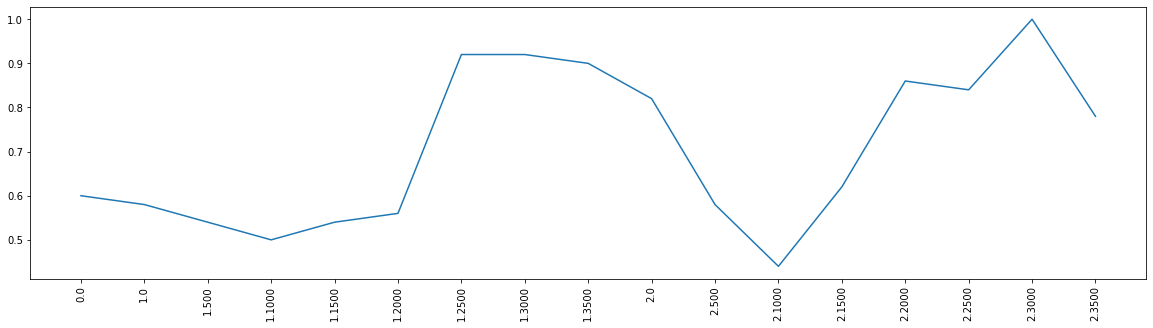

In [16]:
from matplotlib import pyplot as plt

print(my_classifier.graph.get_nodes_list())
print(my_classifier.graph.find_origin_node())
print(my_classifier.classifier_properties.active_stage_id)
print (my_classifier.graph.custom_matrix)
x_axis, merged_dict=my_classifier.show_live_stage_history( metric="running_accuracy")
plt.figure(figsize=(20, 5))
plt.plot(x_axis, merged_dict["SIS_10e10_sub_test"])
plt.xticks(rotation=90)  # Orient the x-axis ticks vertically
plt.show()

In [2]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="SimpleResnetWithNoise2")
my_classifier._plot_concatenated_data()

Right now considering only selection by catalog and not by dataset in plotting in substructure_classifier_development.py
running loss plot for the training catalogs
Live metrics not found for stage 282a9952d3c47f6f262d034e107d606e746a85af79afcff0bf7b22c38869bd10
Offline metrics not found for stage 282a9952d3c47f6f262d034e107d606e746a85af79afcff0bf7b22c38869bd10


AttributeError: 'NoneType' object has no attribute 'sample_number'

In [1]:
from sensitivity_map import SensitivityMapMakerDevelopment
from substructure_classifier.training_stage_development import Stage
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

system_dict={
            "system_index": 3,
            "precomputed": {
                "D_l": 1763.3615931756483,
                "D_s": 1684.9325216908157,
                "D_ls": 600.1695758315849,
                "Theta_E": 6.025124235533167e-06
            },
            "lens_model": {
                "num_substructures": 1,
                "mass_components": [
                    {
                        "type": "SIS",
                        "is_substructure": False,
                        "params": {
                            "pos": [
                                0.0,
                                0.0
                            ],
                            "redshift": 1.233644842102517,
                            "vel_disp": 347.81879203057474
                        }
                    },
                    # the substructures get cleaned in the sensitivity map maker.
                    {
                        "type": "NFW",
                        "is_substructure": True,
                        "params": {
                            "pos": [
                                -1.3712723774601868e-07,
                                2.1367767346155093e-06
                            ],
                            "mass_max": 10000000000.0,
                            "r_max_kpc": 1.0,
                            "redshift": 1.233644842102517
                        }
                    }
                ]
            },
            "source_model": {
                "type": "Gaussian_blob",
                "params": {
                    "I": 1.0,
                    "position_rad": [
                        -2.6222961597489246e-08,
                        -1.270741224218255e-08
                    ],
                    "orient_rad": 0.0,
                    "q": 0.8,
                    "std_kpc": 0.8,
                    "redshift": 4.977877333597265
                }
            }
}

loaded_classifier=SubstructureClassifier(classifier_name="ResnetOnSmallPsf")
classifier_stage=Stage(classifier_instance=loaded_classifier , stage_id="71412f4bcacad21b9f6cc11dffb23bfe499823892de7a8b68205c8fc98413d60")


dataset_str="AlmaSinglePsfDataset"
dataset_config={
    "psf_name": "devon_first_advice_psf_3_pix_16_arcsec",
    "noise_std": 0.0
}

# dataset_str="NoNoiseDataset"

# dataset_config={
#     "grid_width_arcsec": 6.0,
#     "grid_pixel_side": 100,
#     "broadcasting": True
# }

substructure_to_test_dict={
    "type": "NFW",
    "is_substructure": True,
    "params": {
        "pos": [
            -1.3712723774601868e-07,
            2.1367767346155093e-06
        ],
        "mass_max": 10000000000.0,
        "r_max_kpc": 1.0,
        "redshift": 1.233644842102517
    }
}


maker=SensitivityMapMakerDevelopment(system_dict,
                                    dataset_str,
                                    dataset_config,
                                    Stage_obj=classifier_stage,
                                    substructure_to_test_dict=substructure_to_test_dict,
                                    eval_grid_width_arcsec=6.0,
                                    eval_grid_pixels_side=100,
                                    eval_mode="compute_over_simple_grid",
                                    sub_detec_criterion="mass_max",
                                    sub_detect_criterion_threshold=1e5,
                                    criterion_high_bound=10e10,
                                    criterion_low_bound=1e5
)


/home/francesco/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu
Currently this dataloader is calculating the images in float32
Using device in AlmaSinglePsfDataset: cuda
PSF side pixels: 2292
Original PSF shape: torch.Size([1, 1, 2292, 2292])
alert: FOV is hardcoded to 8.0 arcseconds. To hide this, set alert=False
Created grid with size 1146x1146 (half of PSF)
Dataset initialized with noise_std=0.0, threshold=None


/home/francesco/Desktop/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it


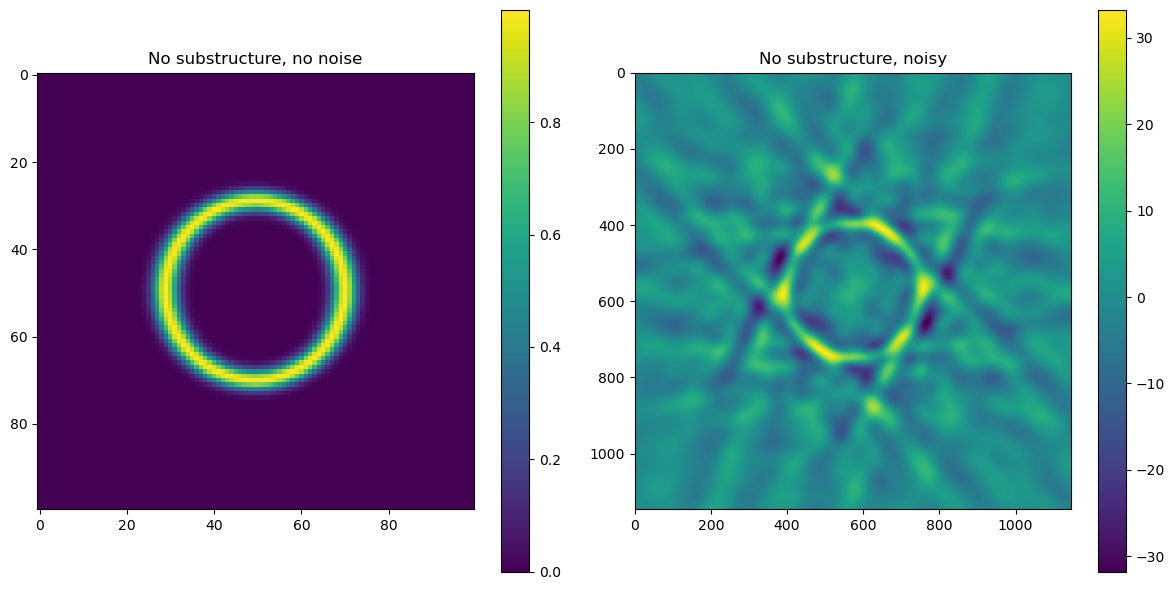

Loading paramters of the current stage, not the parent. This mode is intended for using an already trained stage for some evaluations


FileNotFoundError: [Errno 2] No such file or directory: '/home/francesco/Desktop/master_thesis_code/trained_classifiers/ResnetOnSmallPsf/stages/71412f4bcacad21b9f6cc11dffb23bfe499823892de7a8b68205c8fc98413d60/trained_params.pth'

In [2]:
maker.compute_sensitivity_map(grid_refinement_iterations=0)


from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="simple_vit1")
my_classifier._plot_concatenated_data()

Right now considering only selection by catalog and not by dataset in plotting in substructure_classifier_development.py
running loss plot for the training catalogs
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


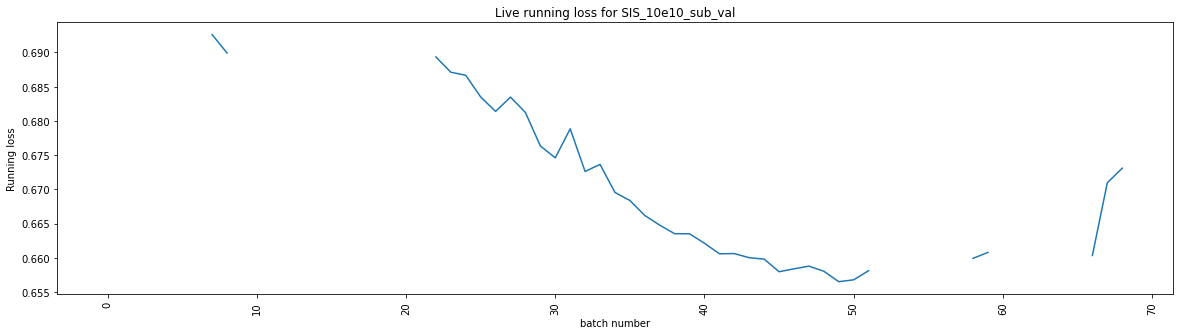

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


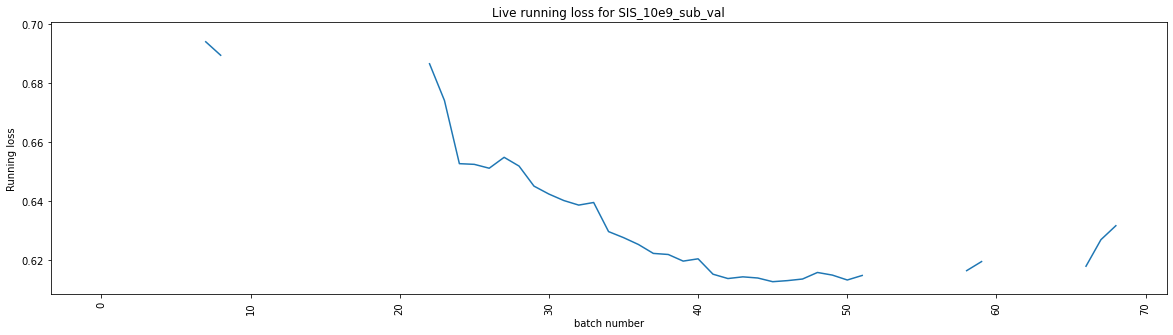

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


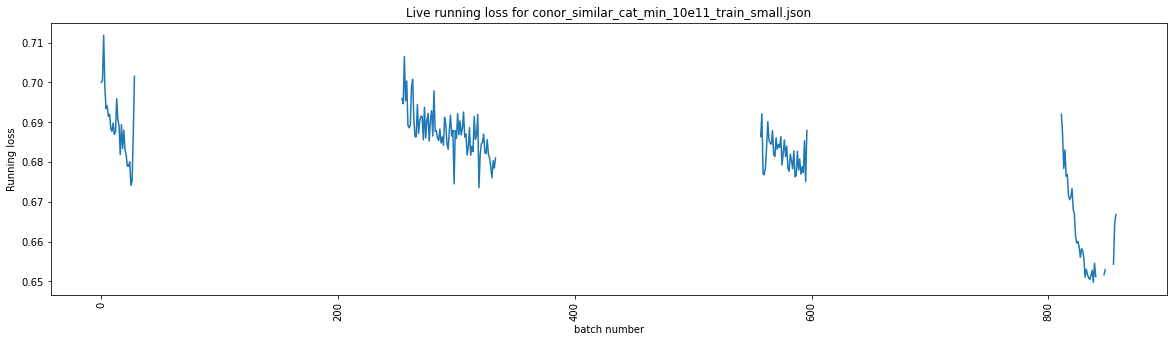

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


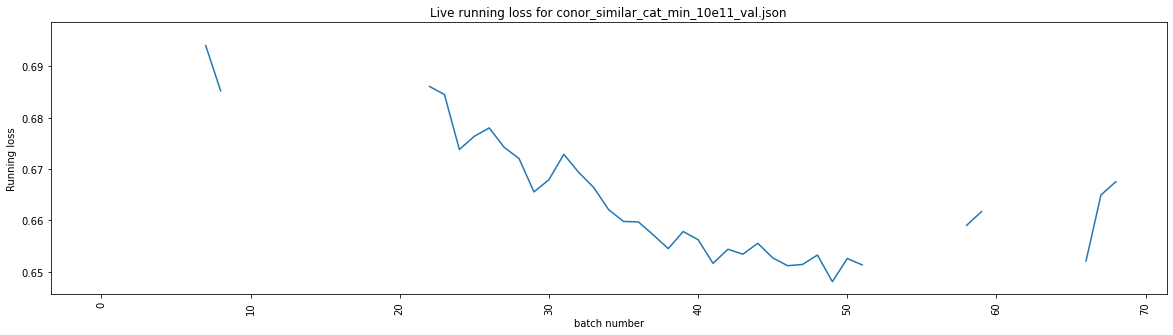

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


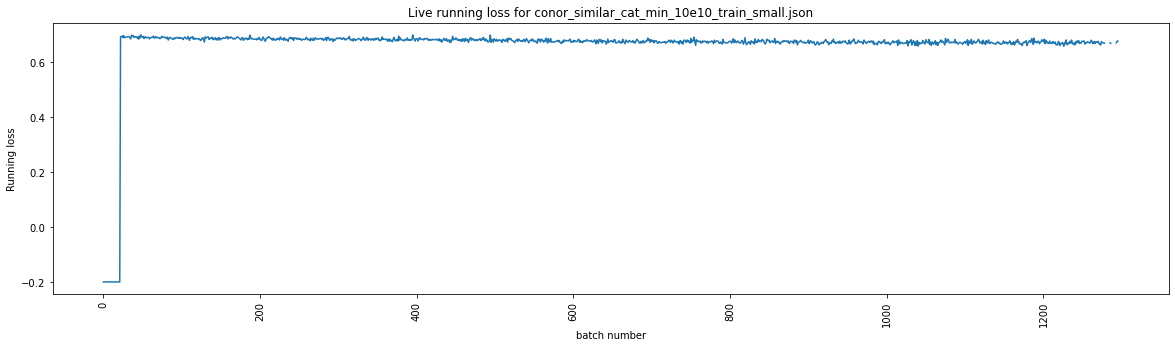

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


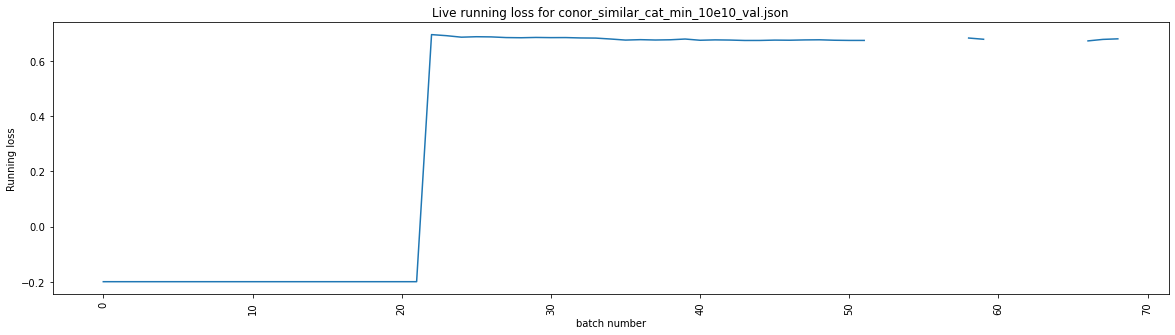

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


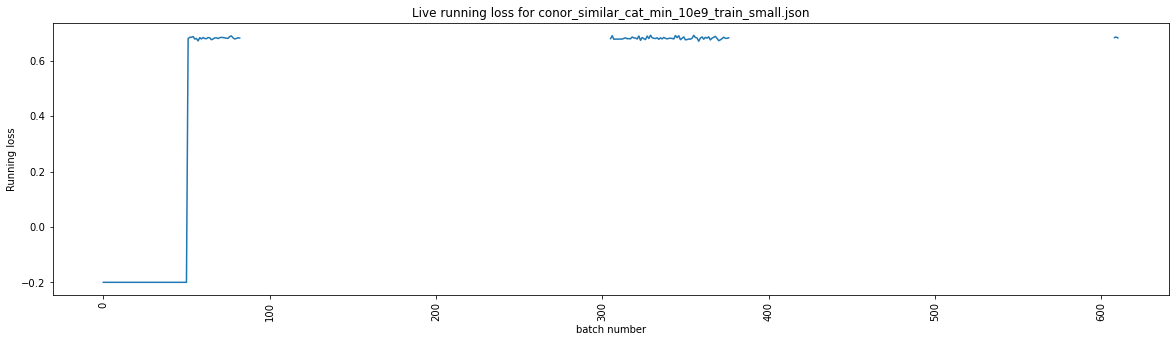

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


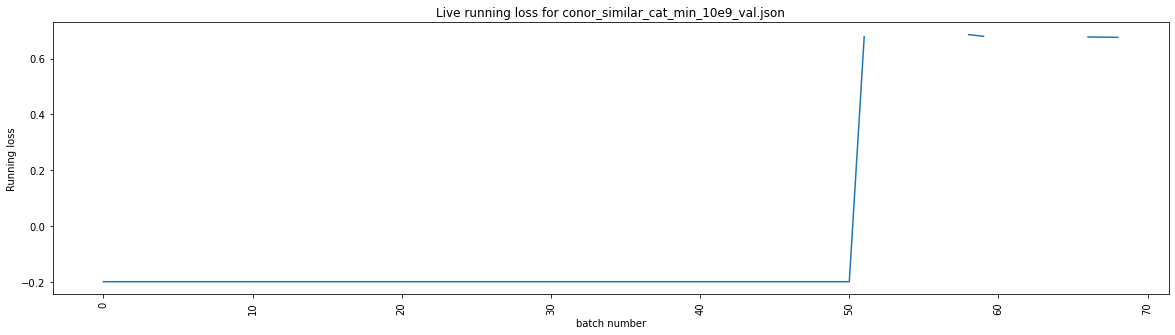

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


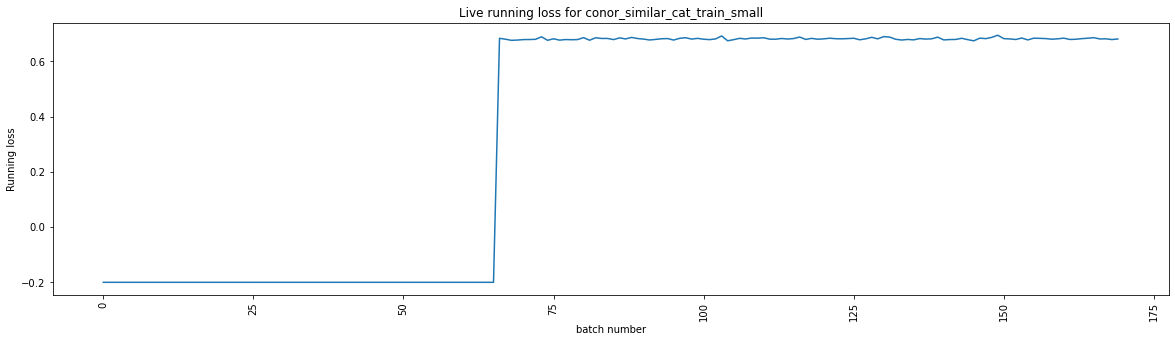

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26


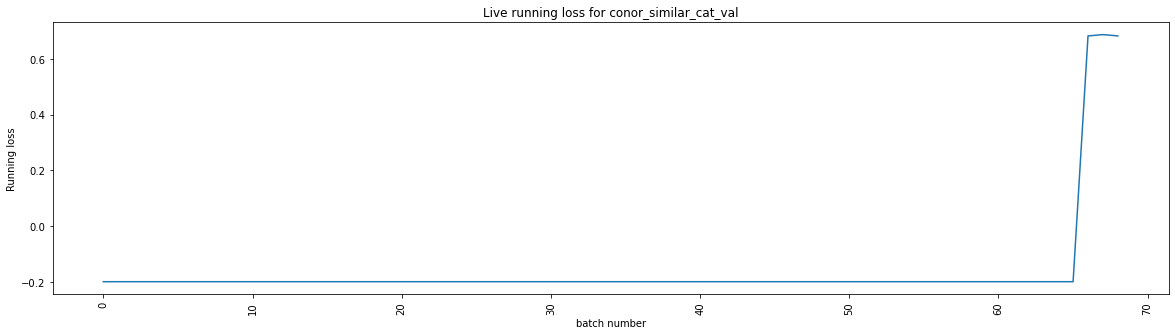

hard coded shown metrics at _plot_concatedated_data in substructure_classifier_development.py
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metr

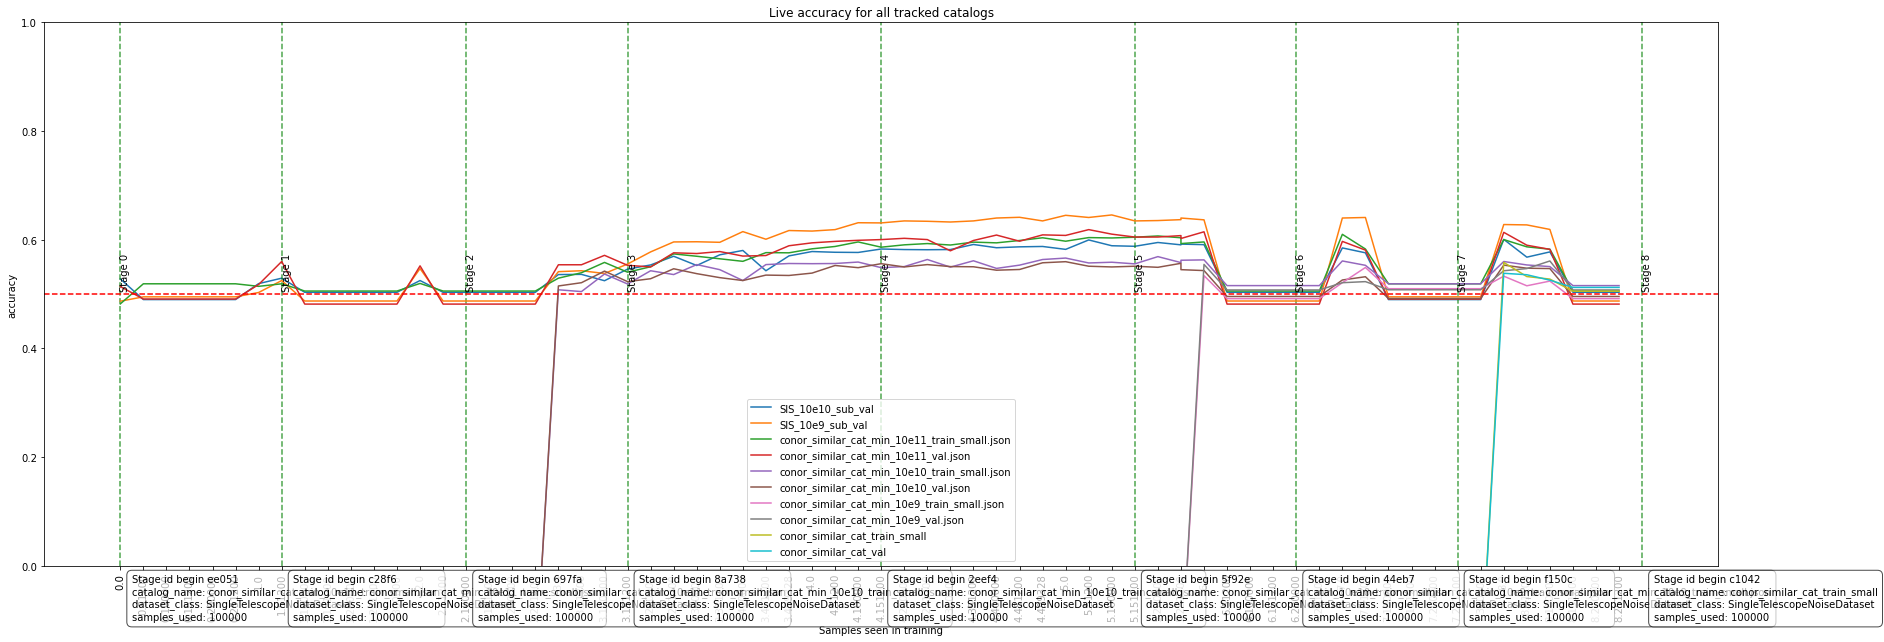

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live 

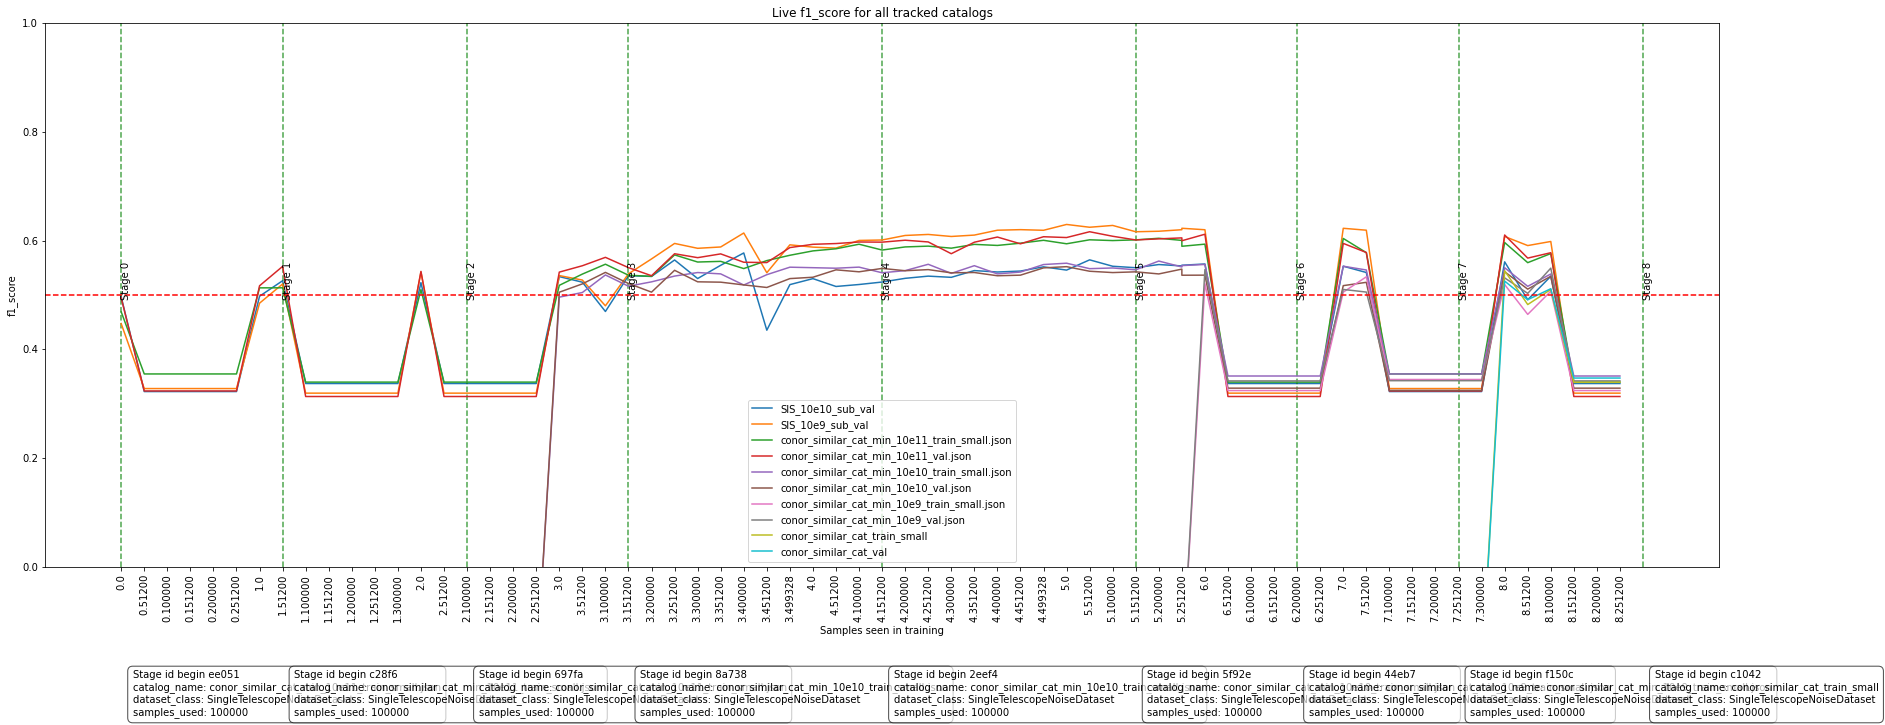

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live 

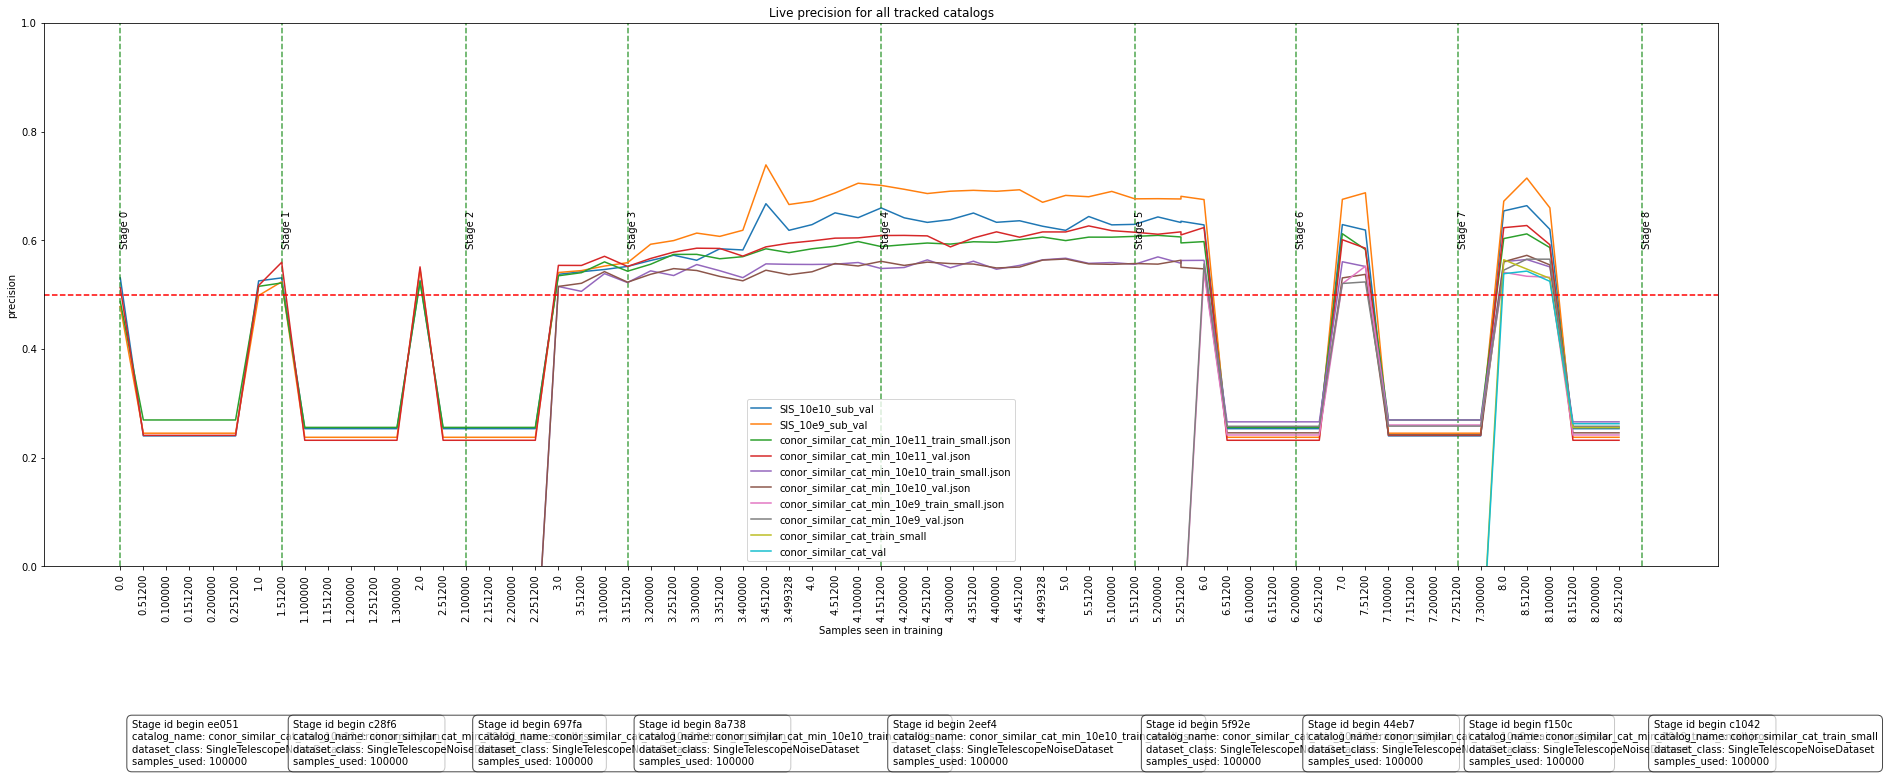

Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Offline metrics not found for stage 94cbcb2f195b6c3ea786b2541555352cd28eb4b83ec83fe9e7302c0db6eebd26
Live 

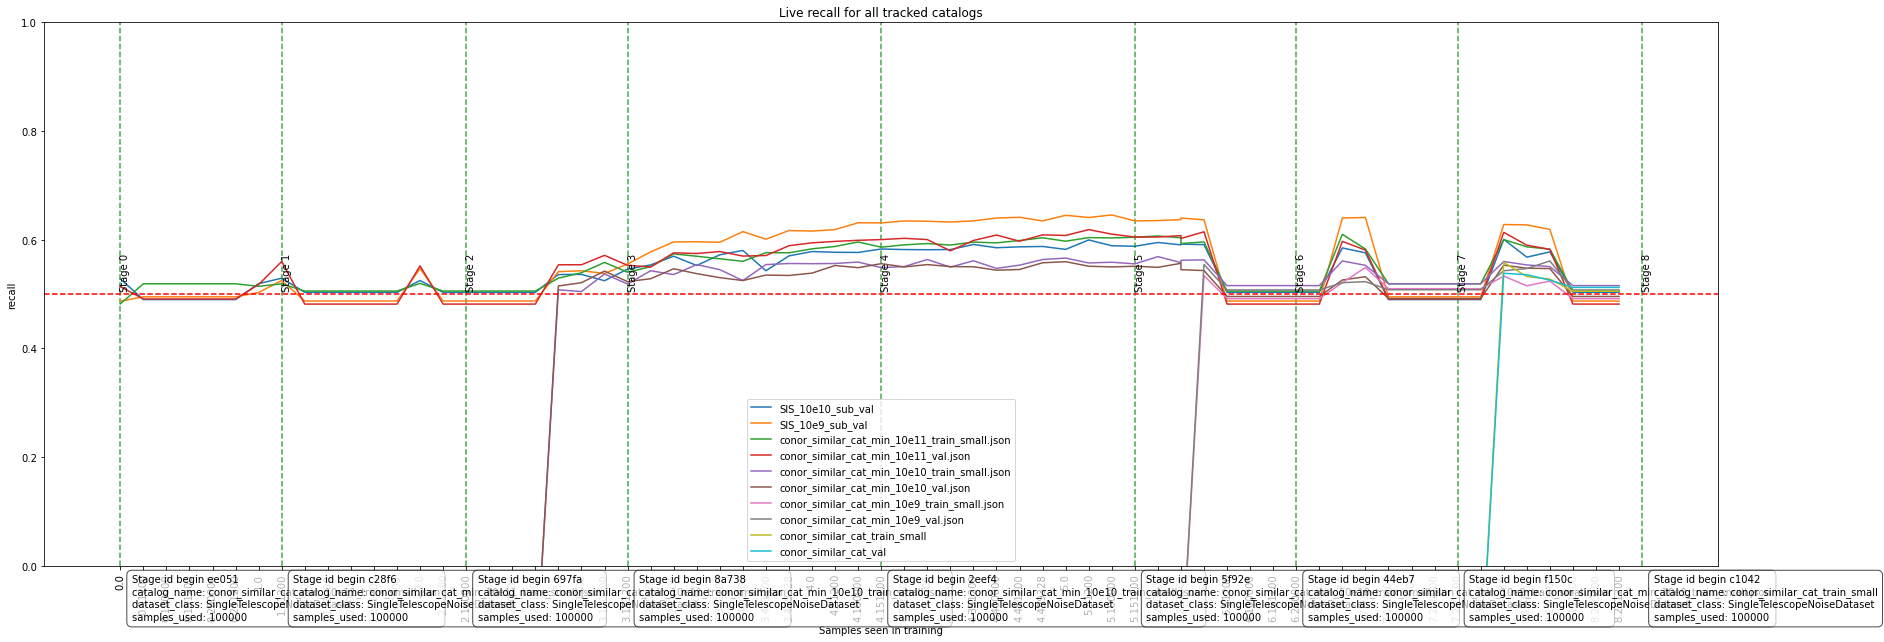

In [6]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="SimpleResnetWithNoise1")
my_classifier._plot_concatenated_data()